<a href="https://colab.research.google.com/github/HenriqueCCdA/bootCampAluraDataScience/blob/master/modulo3/aulas/boot_camp_modulo3_aulas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1

## Aula 1.1)

In [1]:
uri = "https://raw.githubusercontent.com/HenriqueCCdA/bootCampAluraDataScience/master/modulo3/dados/dados_covid_sp.csv"

In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv(uri, sep=";")

In [4]:
dados.shape

(286178, 26)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286178 entries, 0 to 286177
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   nome_munic     286178 non-null  object 
 1   codigo_ibge    286178 non-null  int64  
 2   dia            286178 non-null  int64  
 3   mes            286178 non-null  int64  
 4   datahora       286178 non-null  object 
 5   casos          286178 non-null  int64  
 6   casos_novos    286178 non-null  int64  
 7   casos_pc       286178 non-null  object 
 8   casos_mm7d     286178 non-null  object 
 9   obitos         286178 non-null  int64  
 10  obitos_novos   286178 non-null  int64  
 11  obitos_pc      286178 non-null  object 
 12  obitos_mm7d    286178 non-null  object 
 13  letalidade     286178 non-null  object 
 14  nome_ra        285735 non-null  object 
 15  cod_ra         286178 non-null  int64  
 16  nome_drs       285735 non-null  object 
 17  cod_drs        286178 non-nul

In [7]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [8]:
dados["datahora"] = pd.to_datetime(dados["datahora"], format="%Y-%m-%d")

In [9]:
import matplotlib as mpl

In [10]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

In [11]:
import seaborn as sns

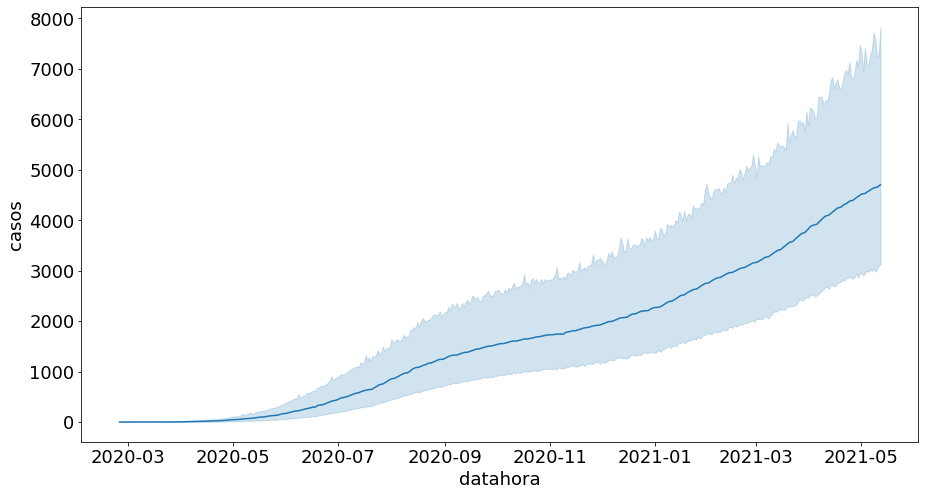

In [12]:
sns.lineplot(x='datahora', y = 'casos', data = dados)

$$ e^x $$

In [13]:
import numpy as np

In [14]:
eixo_x = np.linspace(-2, 2, 100)

In [15]:
y_exp = np.exp(eixo_x) 

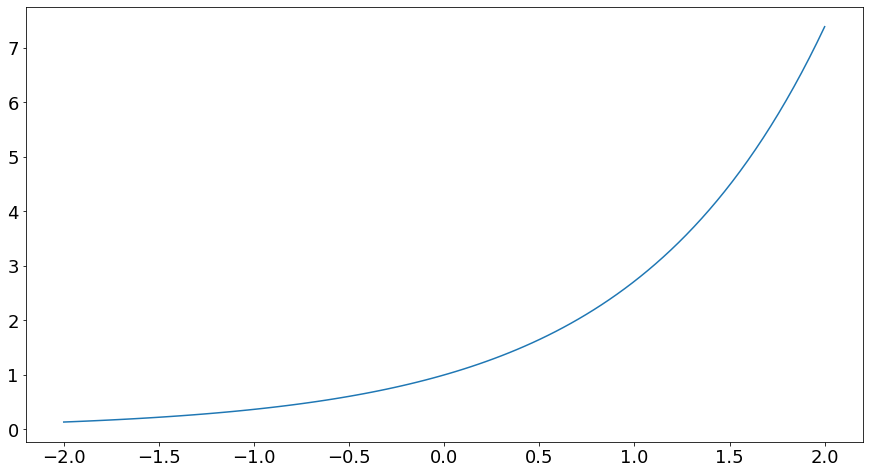

In [16]:
sns.lineplot(x = eixo_x, y = y_exp)

$$ log_2 2 = 1 $$
$$ log_2 2^x = x$$
$$ log_e e^x = x$$

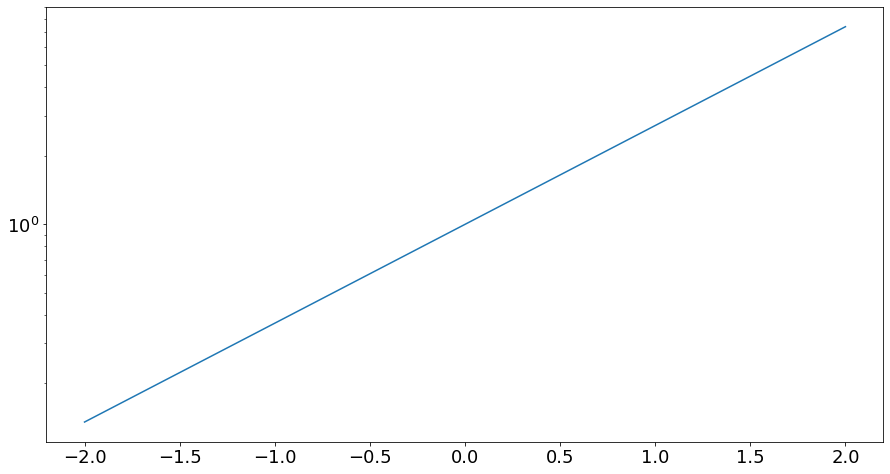

In [21]:
sns.lineplot(x = eixo_x, y = y_exp)
mpl.pyplot.yscale('log')

In [22]:
dados_sp = dados.query('nome_munic == "São Paulo"')

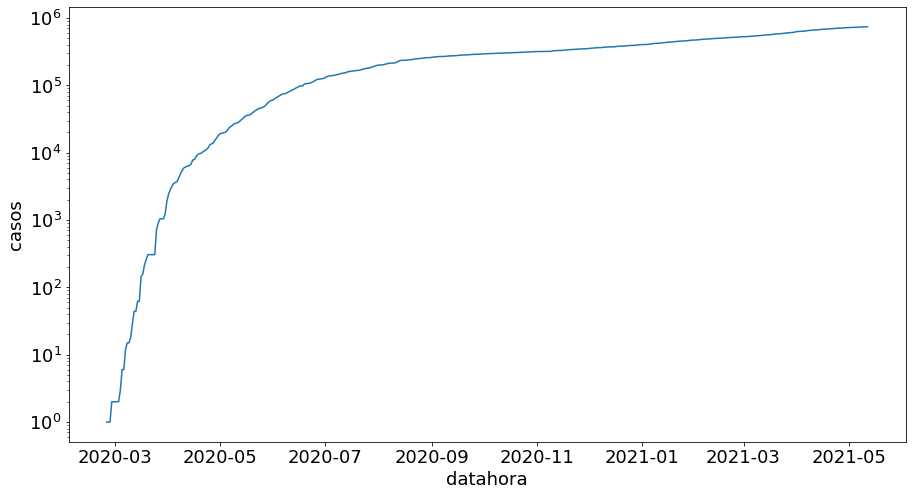

In [23]:
sns.lineplot(x='datahora', y='casos', data=dados_sp)
mpl.pyplot.yscale('log')

## Aula 1.2)

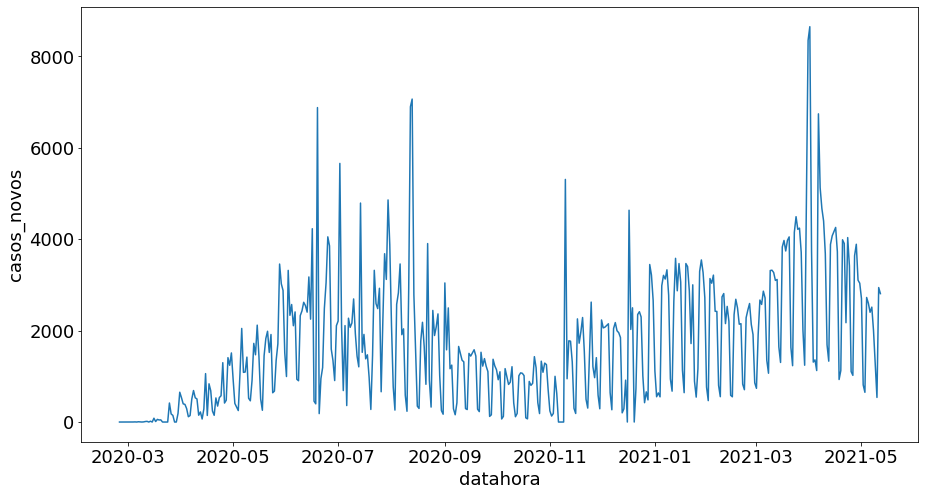

In [24]:
sns.lineplot(x='datahora', y='casos_novos', data = dados_sp)

In [25]:
dados_exemplo = pd.DataFrame(data=np.linspace( 1, 10, 10))

In [26]:
dados_exemplo.head()

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [27]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()

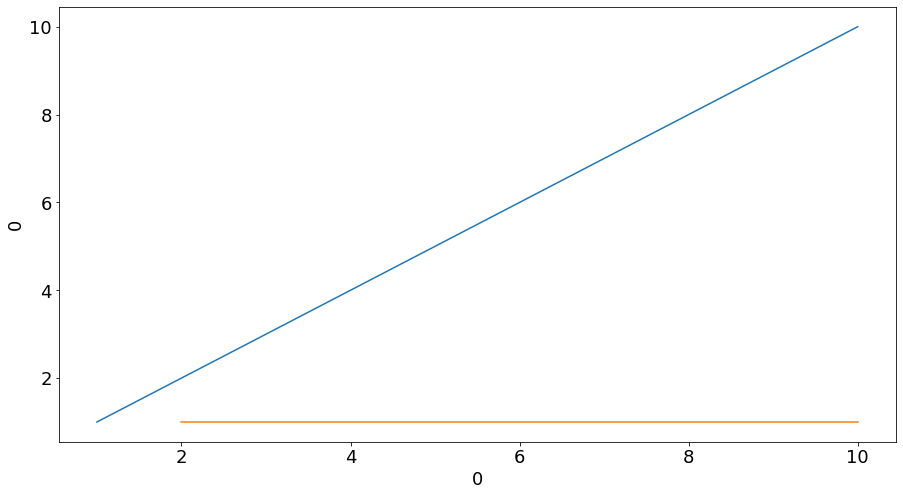

In [28]:
sns.lineplot(x = 0, y = 0, data=dados_exemplo)
sns.lineplot(x = 0, y = 'diferenciado', data=dados_exemplo)

$$y = a x + b$$

In [29]:
dados_sp['taxa_de_crescimento_casos'] =  dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] =  dados_sp['obitos_novos'].diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


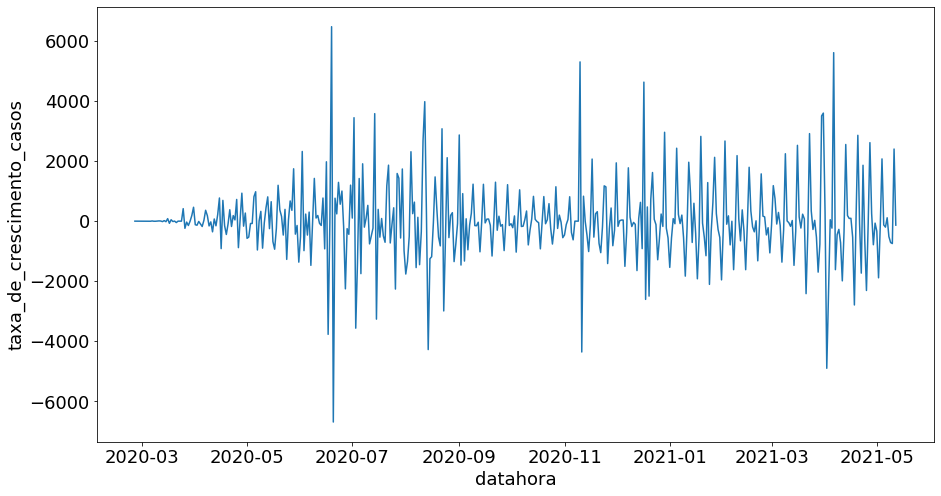

In [30]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data = dados_sp)

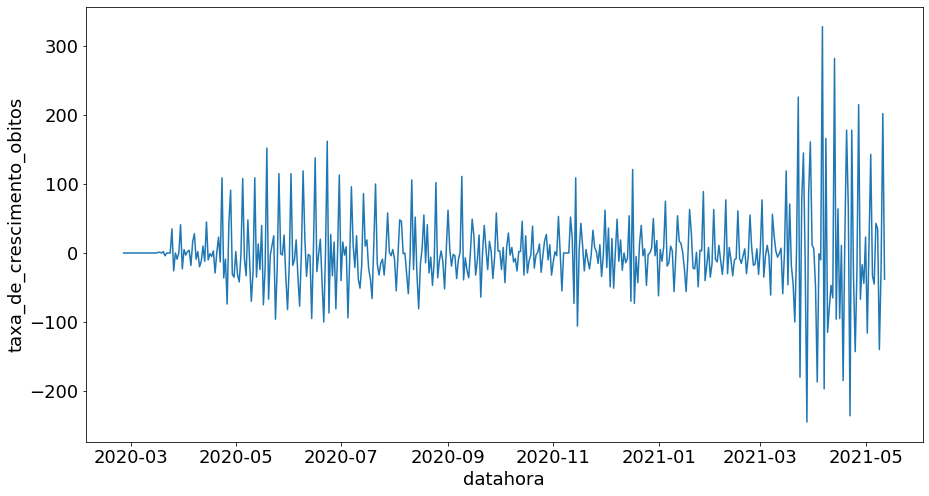

In [31]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data = dados_sp)

In [32]:
import matplotlib.pyplot as plt

<BarContainer object of 443 artists>

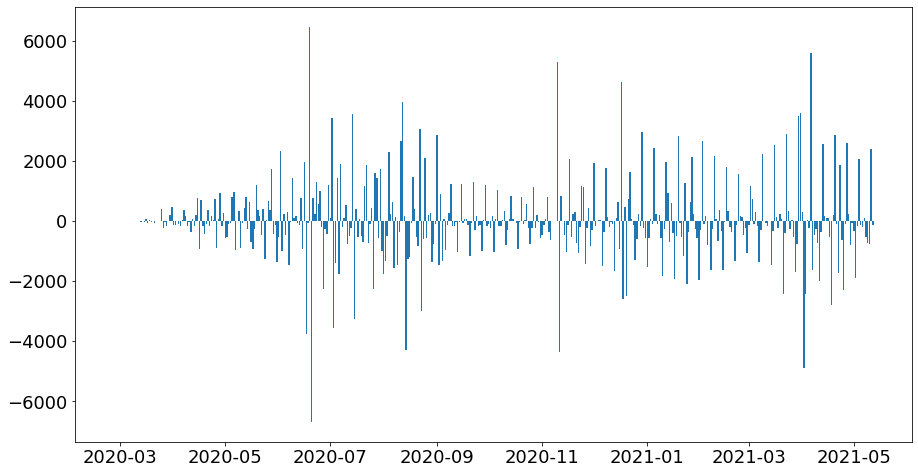

In [33]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

In [34]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
dados_2021 = dados_sp.query('ano == 2021')

<BarContainer object of 132 artists>

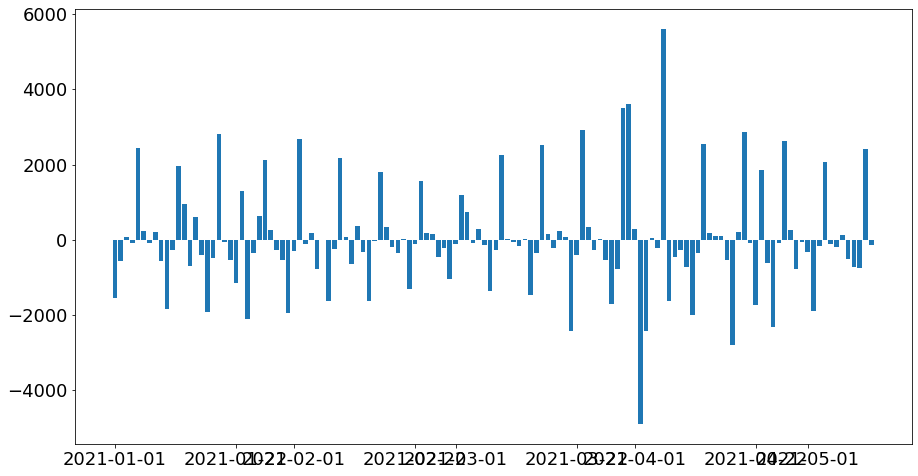

In [36]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])

In [37]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


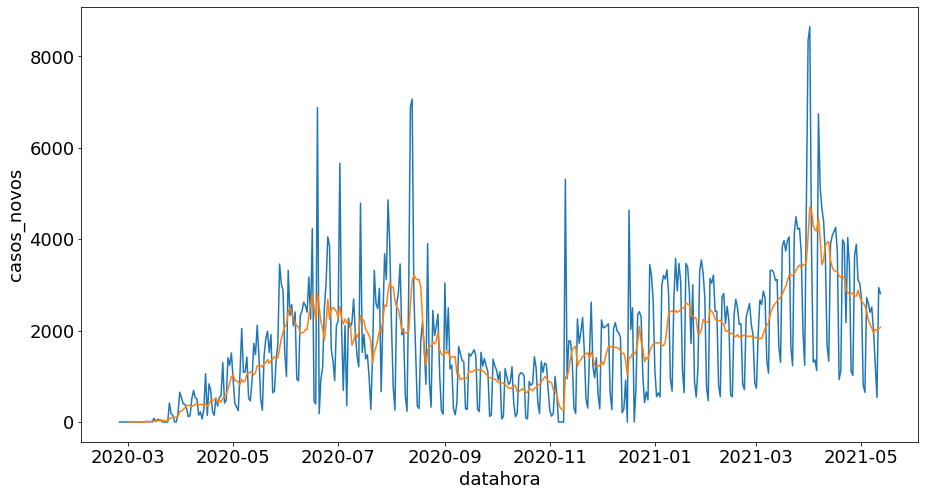

In [38]:
sns.lineplot(x='datahora', y = 'casos_novos', data=dados_sp)
sns.lineplot(x='datahora', y = 'media_movel_casos', data=dados_sp)

## Aula 1.3)

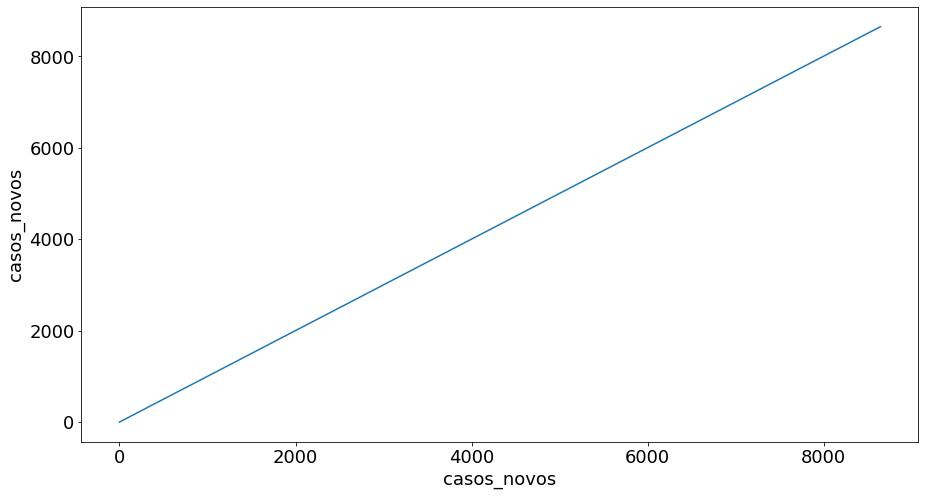

In [39]:
sns.lineplot(x='casos_novos', y='casos_novos', data=dados_sp)

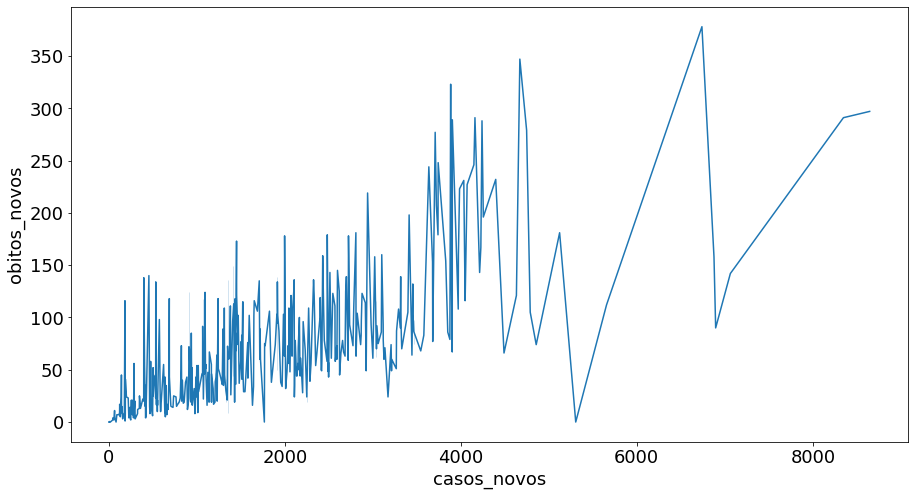

In [40]:
sns.lineplot(x='casos_novos', y='obitos_novos', data=dados_sp)

In [42]:
dados_202101 = dados_sp.query('mes == 1 & ano == 2021')
dados_202102 = dados_sp.query('mes == 2 & ano == 2021')

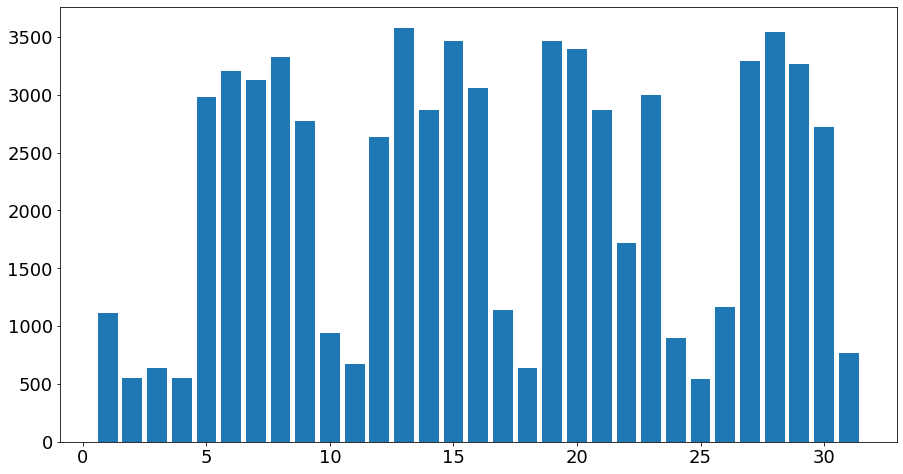

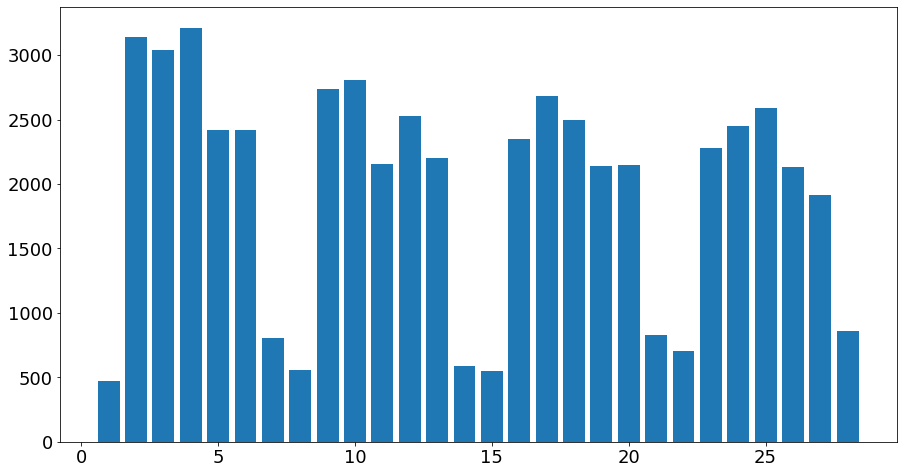

In [44]:
plt.bar(np.linspace(1, 31, 31), dados_202101['casos_novos'])

plt.show()

plt.bar(np.linspace(1, 28, 28), dados_202102['casos_novos'])

plt.show()

In [45]:
from pandas.plotting import autocorrelation_plot

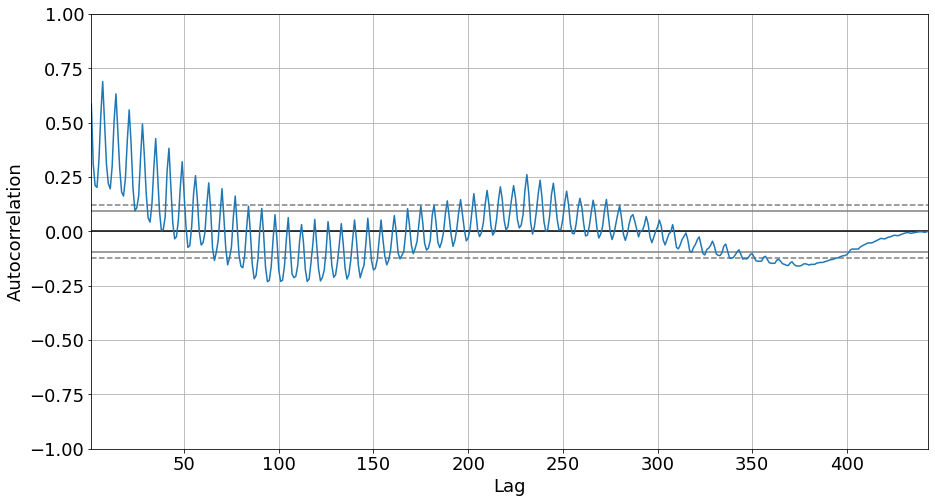

In [46]:
autocorrelation_plot(dados_sp['casos_novos'])

In [47]:
dados_sp.shape

(443, 31)

In [48]:
aleatorio = np.random.rand(443)

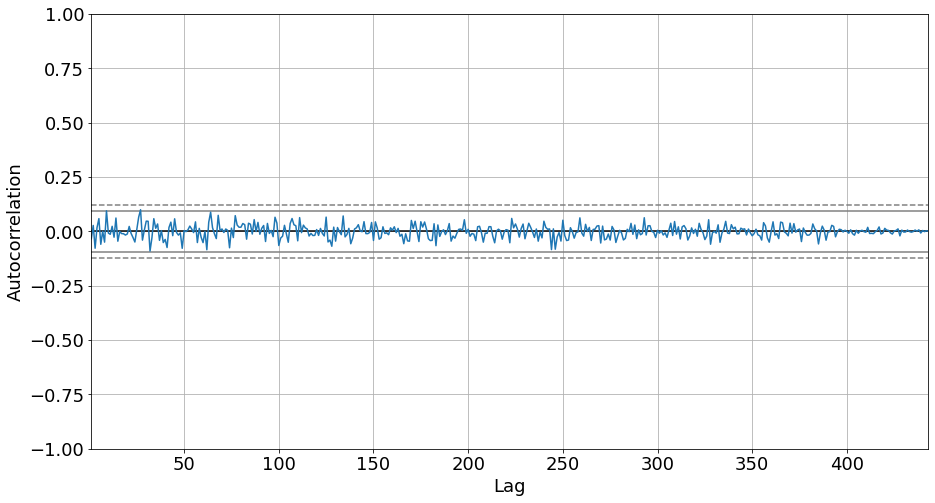

In [49]:
autocorrelation_plot(aleatorio)